## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
# 1

cdf = pd.read_csv("./data/USA_cars_datasets.csv", low_memory=False)
cdf = cdf[["price", "year", "mileage"]]
print(cdf.shape) # 2499 rows, 3 columns
print(f"Total missing: {cdf.isnull().sum().sum()}") # no NA values
cdf.head()

(2499, 3)
Total missing: 0


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [28]:
# 2

def maxmin(x):
    return (x - min(x)) / (max(x) - min(x))

cdf["year"] = maxmin(cdf["year"])
cdf["mileage"] = maxmin(cdf["mileage"])

In [5]:
# 3

xtrain, xtest, ytrain, ytest = train_test_split(cdf[["year", "mileage"]], cdf["price"], test_size=0.2, random_state=100)

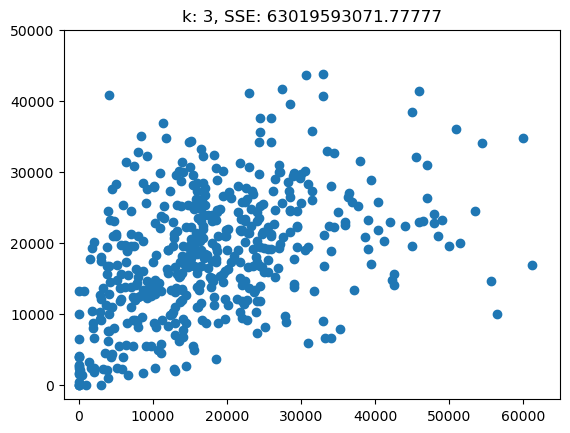

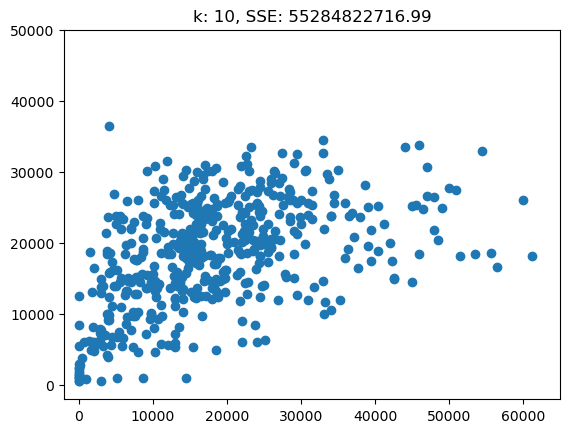

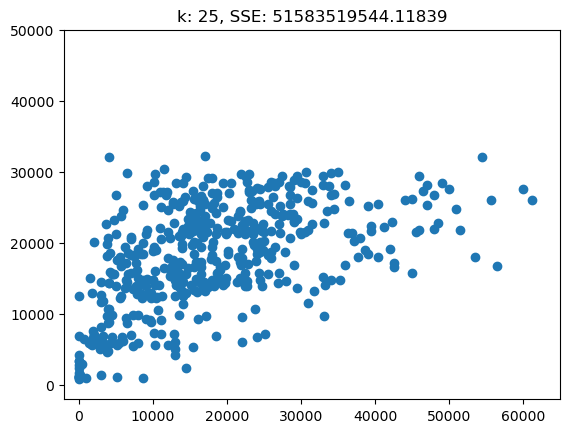

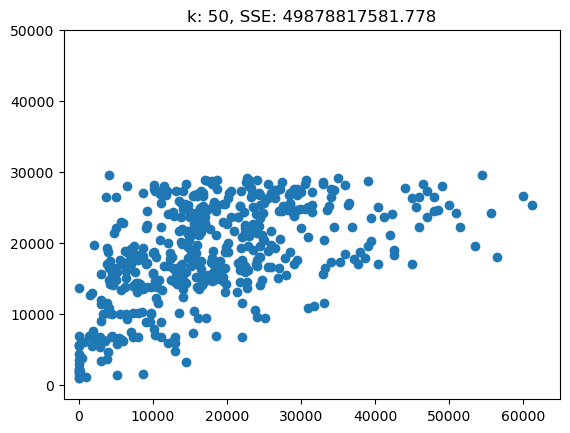

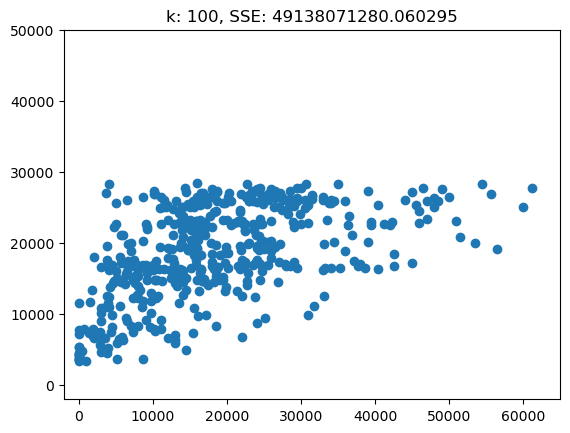

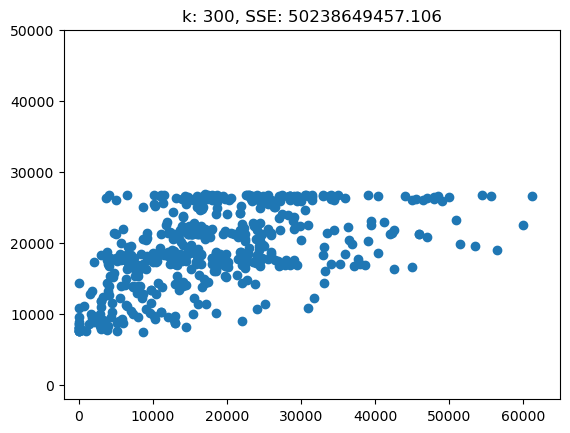

In [11]:
# 4

for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(xtrain, ytrain)
    yhat = model.predict(xtest)
    sse = np.sum((ytest - yhat) ** 2)
    plt.scatter(ytest, yhat)
    plt.title(f"k: {k}, SSE: {sse}")
    plt.gca().set_ylim(-2000, 50000)
    plt.gca().set_xlim(-2000, 65000)
    plt.show()

optimal k: 77


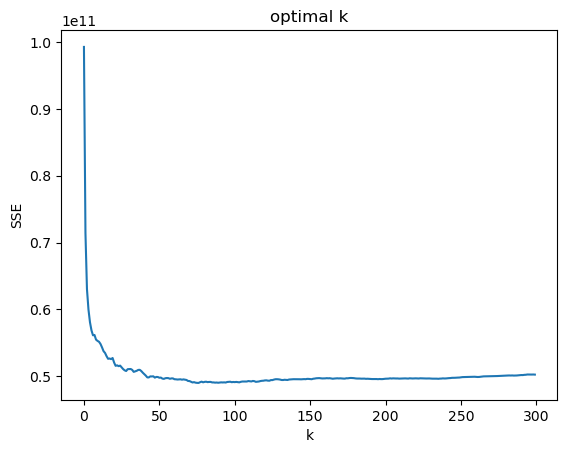

In [20]:
# 5

karr = np.arange(1, 301)
sse = np.zeros(300)
ssemin = np.min(sse)
for k in range(300):
    model = KNeighborsRegressor(n_neighbors=k + 1).fit(xtrain, ytrain)
    yhat = model.predict(xtest)
    sse[k] = np.sum((ytest - yhat) ** 2)

ssemin = np.min(sse)
index = np.where(sse == ssemin)[0]
opt = karr[index]
print("optimal k:", end=" ")
print(*opt, sep=", ")
plt.plot(np.arange(0, 300), sse)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("optimal k")
plt.show()

In [21]:
# 6

cdf.describe()

# the optimal value for k is 77, so the model for 3, 10, and 25 is underfitting and the model for 300 is overfitting. The modles for 50 and 100 are closer to what the optimal graph would be with 100 being a bit closer. As k grows, we see that the points become more squished, and the y range becomes smaller and more centered around the average, meaning that outlier values become less influential. This becomes especially apparent when we compare k=3, a more scattered graph with high variance due to underfitting, to k=300, where we can see several tracably horizontal lines of points in the graph due to overfitting.

,price,year,mileage
count,2499.000000,2499.000000,2499.000000
mean,18767.671469,0.930091,0.051377
std,12116.094936,0.073248,0.058654
min,0.000000,0.000000,0.000000
25%,10200.000000,0.914894,0.021088
50%,16900.000000,0.957447,0.034742
75%,25555.500000,0.978723,0.062354
max,84900.000000,1.000000,1.000000


**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [23]:
#1

hdf = pd.read_csv("./data/heart_failure_clinical_records_dataset.csv", low_memory=False)
hdf = hdf.drop("time", axis=1)
print(hdf.shape) # 299 rows, 12 columns
print(f"Total missing: {hdf.isnull().sum().sum()}") # no NA values
hdf.head()

(299, 12)
Total missing: 0


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [24]:
# 2

hdf.corr()

# DEATH_EVENT has relatively strong correlation with age (0.25), ejection_fraction (-0.27), and serum_creatinine(0.29)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [25]:
# 3

arr = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

for i in arr:
    display(hdf[[i, "DEATH_EVENT"]].groupby(i).describe())

# Only anaemia and high_blood_pressure have higher death rates when the variables have a value of 1 instead of 0. All other variables have very little to no difference in proportion of deaths.

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0

DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0

DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.371429  0.485504  0.0  0.0  0.0  1.0  1.0

DEATH_EVENT                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
0         105.0  0.323810  0.470173  0.0  0.0  0.0  1.0  1.0
1         194.0  0.319588  0.467523  0.0  0.0  0.0  1.0  1.0

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
smoking                                                         
0             203.0  0.325123  0.469579  0.0  0.0  0.0  1.0  1.0
1              96.0  0.312500  0.465946  0.0  0.0  0.0  1.0  1.0

In [26]:
# 4

x = hdf[["age", "ejection_fraction", "serum_creatinine", "anaemia", "high_blood_pressure"]]
y = hdf["DEATH_EVENT"]

In [30]:
# 5

x = x.apply(maxmin)

In [ ]:
# 6

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=100)

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)